In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("troponin_pod1_regression_input.csv")
df.columns

Index(['Age', 'Room', 'Sex', 'Ht', 'Wt', 'BMI', 'Cr_MELD', 'Na_MELD', 'MELD',
       'DM_Tx',
       ...
       'HR_mean7', 'SBP_mean7', 'DBP_mean7', 'opBgn2Reperf_hr',
       'Reperf2opTer_hr', 'anes_dur_hr', 'op_bgn_hr', 'op_ter_hr', 'op_mon',
       'op_yr'],
      dtype='object', length=104)

In [3]:
cnt = 0
continuous_vars = []
for col in df.columns :
    if len(df[col].value_counts())>10:
        print(col, len(df[col].value_counts()))
        cnt +=1
        continuous_vars.append(col)
cnt     

Age 53
Ht 321
Wt 622
BMI 1238
Cr_MELD 114
Na_MELD 36
MELD 31
postHD 70
preHD 49
Alb 34
GFR_MDRD 51
Cys_C_GFR 120
Low_opHct 205
CIT 138
WIT 65
GRWR 1216
Crystalloid 157
Colloid 67
UO 440
RBC 18
FFP 21
 Cryo 20
Epi_mcg 17
Intraop_Steroid 241
Cr 113
Cr_pod 12
Cr_prean 106
Cr_anhe 105
Tnl_ind 66
Tnl_anhe 329
Tnl_reperfusion 351
TnI_pod1 252
HR_mean7 808
SBP_mean7 883
DBP_mean7 767
opBgn2Reperf_hr 288
Reperf2opTer_hr 279
anes_dur_hr 312
op_bgn_hr 13
op_ter_hr 18
op_mon 12


41

In [4]:
continuous_vars

['Age',
 'Ht',
 'Wt',
 'BMI',
 'Cr_MELD',
 'Na_MELD',
 'MELD',
 'postHD',
 'preHD',
 'Alb',
 'GFR_MDRD',
 'Cys_C_GFR',
 'Low_opHct',
 'CIT',
 'WIT',
 'GRWR',
 'Crystalloid',
 'Colloid',
 'UO',
 'RBC',
 'FFP',
 ' Cryo',
 'Epi_mcg',
 'Intraop_Steroid',
 'Cr',
 'Cr_pod',
 'Cr_prean',
 'Cr_anhe',
 'Tnl_ind',
 'Tnl_anhe',
 'Tnl_reperfusion',
 'TnI_pod1',
 'HR_mean7',
 'SBP_mean7',
 'DBP_mean7',
 'opBgn2Reperf_hr',
 'Reperf2opTer_hr',
 'anes_dur_hr',
 'op_bgn_hr',
 'op_ter_hr',
 'op_mon']

In [5]:
continuous_vars = ['Age', 'Ht', 'Wt', 'BMI', 'Cr_MELD', 'Na_MELD',
                   'MELD', 'postHD', 'preHD', 'Alb', 'GFR_MDRD',
                   'Cys_C_GFR', 'Low_opHct', 'CIT', 'WIT', 'GRWR',
                   'Crystalloid', 'Colloid', 'UO', 'RBC', 'FFP',
                   ' Cryo', 'Epi_mcg', 'Intraop_Steroid', 'Cr', 'Cr_pod',
                   'Cr_prean', 'Cr_anhe', 'Tnl_ind', 'Tnl_anhe', 
                   'Tnl_reperfusion', 'TnI_pod1', 'HR_mean7', 'SBP_mean7',
                   'DBP_mean7', 'opBgn2Reperf_hr', 'Reperf2opTer_hr', 'anes_dur_hr']

Age
Ht
Wt
BMI
Cr_MELD
Na_MELD
MELD
postHD
preHD
Alb
GFR_MDRD
Cys_C_GFR
Low_opHct
CIT
WIT
GRWR
Crystalloid
Colloid
UO
RBC
FFP
 Cryo
Epi_mcg
Intraop_Steroid
Cr
Cr_pod
Cr_prean
Cr_anhe
Tnl_ind
Tnl_anhe
Tnl_reperfusion
TnI_pod1
HR_mean7


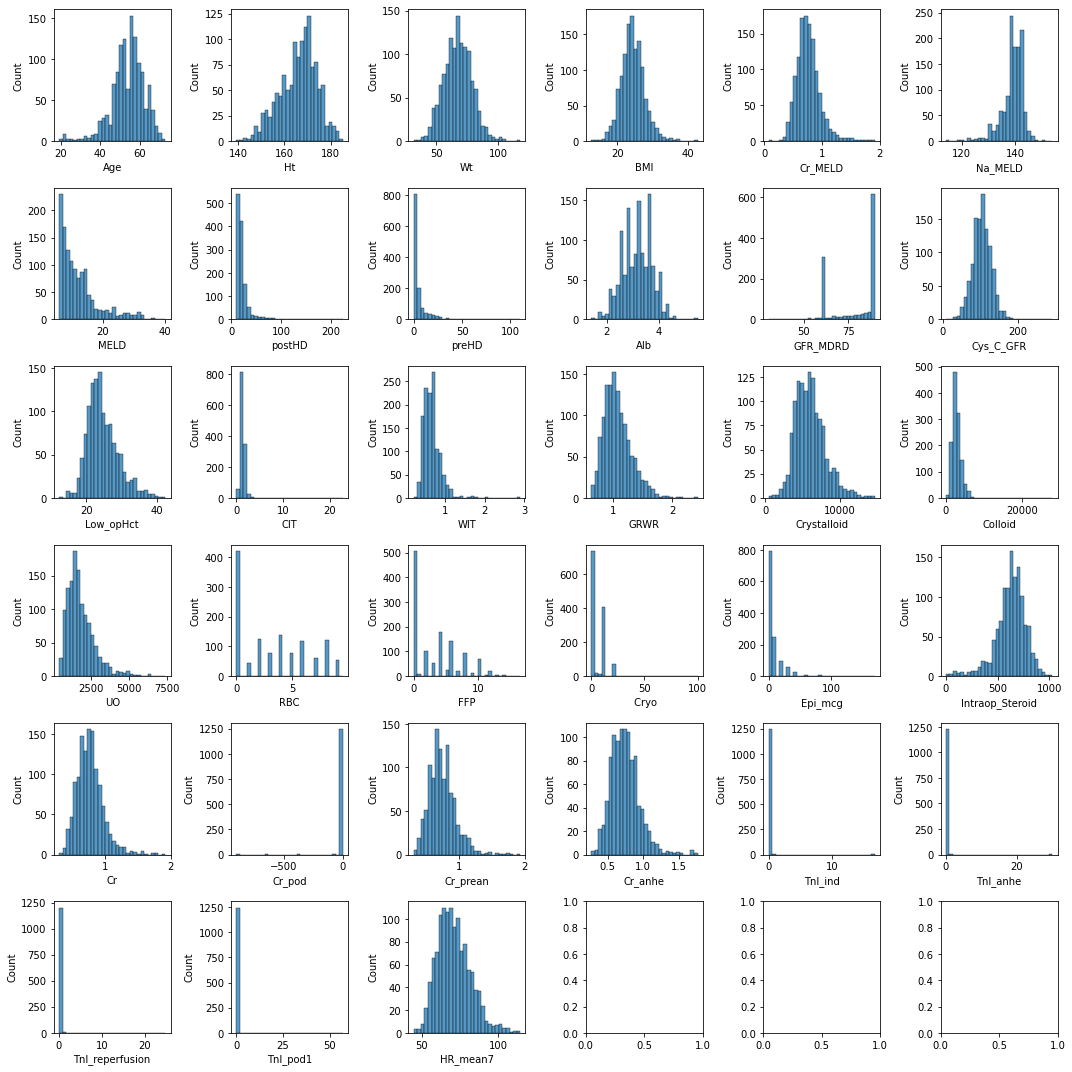

In [6]:
fig, axes = plt.subplots(6, 6, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < 33 :
        print(continuous_vars[i])
        A=df[continuous_vars[i]]
        Anan=A[~np.isnan(A)] # Remove the NaNs
        sns.histplot(Anan, bins=30, ax=ax)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Count'>

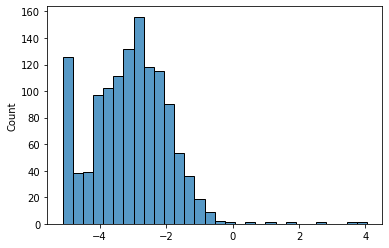

In [7]:
sns.histplot(np.log(df['TnI_pod1'].values), bins=30)
#plt.xlim(0, 1.5)
#plt.yscale('log')

<AxesSubplot:ylabel='Count'>

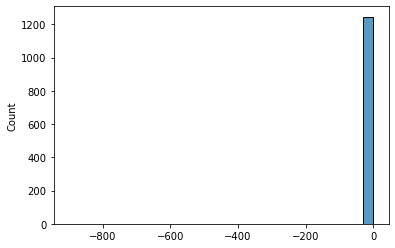

In [8]:
sns.histplot(df['Cr_pod'].values, bins=30)

In [9]:
for col in df.columns :
    print(col, df[col].dtype)

Age int64
Room int64
Sex int64
Ht float64
Wt float64
BMI float64
Cr_MELD float64
Na_MELD int64
MELD int64
DM_Tx int64
HTN int64
CAD float64
CHF float64
PCI_CABG float64
CVA float64
RCRI float64
BB int64
ACEI_ARB int64
Lasix int64
Aldactone int64
CCB int64
Statin int64
AntiPLT int64
AntiCoa int64
Aspirin int64
Afib int64
BBB int64
HBV int64
HCV int64
Alc int64
Biliary int64
Toxic int64
Others int64
HCC int64
FHF float64
Varixbl_LTS int64
SBP_abd int64
IntractableAscites int64
Hydrothorax float64
HEP int64
Mental int64
postHD float64
preHD int64
Loc int64
preVent int64
Liver_replace float64
Pneumonia float64
Bacteremia float64
Organism float64
Sepsis float64
Pre_Norepinephrine int64
Pre_Epinephrine int64
PVT float64
PVS float64
SPAA float64
Alb float64
GFR_MDRD float64
Cys_C_GFR float64
Low_opHct float64
CIT float64
WIT float64
GRWR float64
Biopump int64
Crystalloid int64
Colloid float64
UO int64
RBC float64
FFP float64
 Cryo float64
AP float64
PC int64
op_Dobu int64
op_Epi int64
op_Vaso

In [10]:
columns2log= ['Tnl_ind', 'Tnl_anhe', 'Tnl_reperfusion', 'TnI_pod1']
for i, col in enumerate(columns2log) :
    df[col] = df[col].apply(np.log)

In [12]:
continuous_vars = [var for var in continuous_vars if not var in ['TnI_pod1', 'Cr_pod']]

In [13]:
# init setup
reg1 = setup(data=df, target = 'TnI_pod1', train_size=0.8, 
             categorical_imputation = 'mode',
             numeric_imputation = 'median',
             numeric_features = continuous_vars,
             #ignore_features = ['CAG', 'TimetoCAG'], 
             #normalize=True,
             #pca = True, pca_components = 12,
             remove_multicollinearity = True, multicollinearity_threshold = 0.9, 
             log_experiment = True, 
             experiment_name = 'mihlto')

# return best model
#best = compare_models()

# return best model based on Recall
best = compare_models(sort = 'RMSE') #default is 'Accuracy'

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.5438,0.5778,0.7506,0.5587,0.1874,0.2457,0.1030
omp,Orthogonal Matching Pursuit,0.5629,0.6010,0.7670,0.5390,0.1936,0.2606,0.1030
ridge,Ridge Regression,0.5634,0.6080,0.7711,0.5351,0.1933,0.2472,0.1000
catboost,CatBoost Regressor,0.5601,0.6220,0.7805,0.5263,0.1914,0.2679,3.5720
gbr,Gradient Boosting Regressor,0.5607,0.6295,0.7834,0.5238,0.1934,0.2602,0.0650
lr,Linear Regression,0.5756,0.6284,0.7847,0.5189,0.1982,0.2671,0.2400
lightgbm,Light Gradient Boosting Machine,0.5791,0.6497,0.7992,0.5028,0.1949,0.2458,3.4250
rf,Random Forest Regressor,0.5757,0.6738,0.8106,0.4901,0.2012,0.2761,0.1210
et,Extra Trees Regressor,0.5804,0.6808,0.8174,0.4785,0.2015,0.2753,0.1220
xgboost,Extreme Gradient Boosting,0.5980,0.7114,0.8344,0.4609,0.2003,0.2819,64.0320


In [14]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5901,1.1749,1.0839,0.2404,0.2002,0.2702
1,0.5402,0.4434,0.6659,0.6110,0.1703,0.1922
2,0.5254,0.4893,0.6995,0.6307,0.1839,0.2521
3,0.5292,0.5267,0.7258,0.4545,0.1965,0.2212
4,0.5183,0.4543,0.6740,0.6146,0.1882,0.2417
5,0.5487,0.6534,0.8083,0.6476,0.1914,0.2028
6,0.5841,0.6133,0.7831,0.5107,0.2121,0.2676
7,0.5168,0.4652,0.6821,0.6161,0.1775,0.2117
8,0.5448,0.4656,0.6824,0.6620,0.1809,0.4063
9,0.5405,0.4917,0.7012,0.5991,0.1728,0.1915


In [15]:
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5889,1.1744,1.0837,0.2407,0.1998,0.2696
1,0.5405,0.4437,0.6661,0.6107,0.1704,0.1923
2,0.5246,0.4891,0.6994,0.6308,0.1838,0.2518
3,0.5299,0.5270,0.7259,0.4542,0.1966,0.2217
4,0.5161,0.4514,0.6719,0.6171,0.1874,0.2403
5,0.5480,0.6533,0.8083,0.6476,0.1913,0.2025
6,0.5842,0.6136,0.7833,0.5105,0.2121,0.2677
7,0.5163,0.4642,0.6813,0.6170,0.1772,0.2113
8,0.5447,0.4654,0.6822,0.6622,0.1804,0.4016
9,0.5405,0.4923,0.7016,0.5986,0.1729,0.1914


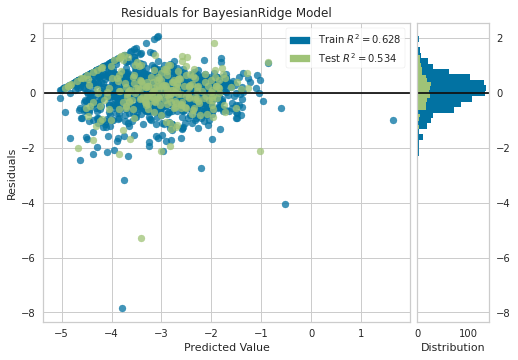

In [17]:
plot_model(tuned_br, 'residuals')

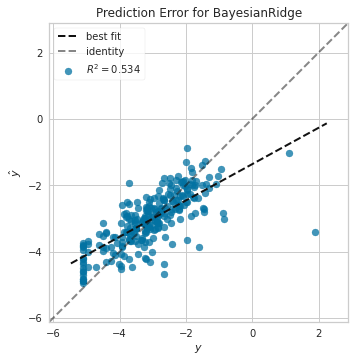

In [18]:
plot_model(tuned_br, 'error')

In [ ]:
plot_model(tuned_br, 'rfe')

IntProgress(value=0, description='Processing: ', max=5)